In [2]:
import pandas as pd

In [7]:
score_data = pd.read_csv('score.csv', encoding = 'euc-kr', index_col = '과목')
# 'data/score.csv' : data폴더에서 score.csv 파일을 불러오기
# encoding : 한글로 변환시켜서 불러오기
# index_col : 인덱스명을 설정해서 불러오기

In [8]:
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


##  유용한 함수

### sort() : 정렬

* 인덱스 기준 정렬하기

In [18]:
score_data.sort_index()

,1반,2반,3반,4반
과목,,,,
과학,11,79,47,26
국어,47,92,45,69
사회,92,81,85,40
수학,45,44,73,39
영어,76,92,45,69


* 데이터 기준으로 정렬하기
* by : 기준을 설정하는 명령(기본값: 오름차순)

In [19]:
score_data.sort_values(by=['3반','1반'], ascending = False)

,1반,2반,3반,4반
과목,,,,
사회,92,81,85,40
수학,45,44,73,39
과학,11,79,47,26
영어,76,92,45,69
국어,47,92,45,69


In [17]:
score_data['3반'].sort_values(ascending = True)

과목
영어    45
국어    45
과학    47
수학    73
사회    85
Name: 3반, dtype: int64

### drop() : 삭제

* inplace = True : 따로 변수에 담아두지 않아도 해당 변수에 바로 변경사항을 저장
* axis = 0 : 행 기준 삭제, 1 : 열 기준 삭제

In [20]:
score_data.drop('사회', inplace = True)

In [21]:
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
과학,11,79,47,26


In [22]:
score_data.drop('4반', axis = 1, inplace = True)
score_data

,1반,2반,3반
과목,,,
수학,45,44,73
영어,76,92,45
국어,47,92,45
과학,11,79,47


In [25]:
score_data = pd.read_csv('score.csv', encoding = 'euc-kr', index_col = '과목')
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


### sum() : 총합

In [26]:
# axis = 0 : 행방향 , 1: 열방향
score_data.sum()

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [27]:
score_data.sum(axis = 1)

과목
수학    201
영어    282
국어    253
사회    298
과학    163
dtype: int64

In [29]:
score_data['총합'] = score_data.sum(axis = 1)
score_data

,1반,2반,3반,4반,총합
과목,,,,,
수학,45,44,73,39,402
영어,76,92,45,69,564
국어,47,92,45,69,506
사회,92,81,85,40,596
과학,11,79,47,26,326


### mean() : 평균

In [32]:
score_data['평균'] = score_data.mean(axis = 1)
# score_data.loc[:,'1반':'4반'].mean(axis = 1)
score_data

,1반,2반,3반,4반,총합,평균
과목,,,,,,
수학,45,44,73,39,402,120.6
영어,76,92,45,69,564,169.2
국어,47,92,45,69,506,151.8
사회,92,81,85,40,596,178.8
과학,11,79,47,26,326,97.8


In [34]:
score_data.drop(['총합', '평균'], axis = 1, inplace = True)

### apply () : 사용자 정의 함수를 이용하여 조금 더 복잡한 처리를 해주는 함수

In [36]:
def calculate(x):
    return x.max() - x.min()

In [38]:
# DF 내 전체 데이터에서 각 과목의 최대점수와 최소점수의 차를 구하기
score_data.apply(calculate, axis = 1)

과목
수학    34
영어    47
국어    47
사회    52
과학    68
dtype: int64

In [39]:
# 각 반들끼리의 점수차를 내림차순으로 정렬
score_data.apply(calculate, axis = 1).sort_values(ascending=False)

과목
과학    68
사회    52
국어    47
영어    47
수학    34
dtype: int64

### concat() : 데이터결합

In [41]:
# 승객번호
id = pd.Series(range(1,6))
# 성별
sex = pd.Series(['female','male','male','male','female'])
# 생존여부
survived = pd.Series([1,0,0,1,1])

print(id)
print('-'*25)
print(sex)
print('-'*25)
print(survived)

0    1
1    2
2    3
3    4
4    5
dtype: int64
-------------------------
0    female
1      male
2      male
3      male
4    female
dtype: object
-------------------------
0    1
1    0
2    0
3    1
4    1
dtype: int64


In [43]:
# id, sex, survived라는 Series를 concat 명령을 사용하여 DataFrame화 시키기
data = pd.concat([id, sex, survived], axis = 1)
data.columns = ['Passenger ID', 'Sex', 'Survived']
data

,Passenger ID,Sex,Survived
0,1,female,1
1,2,male,0
2,3,male,0
3,4,male,1
4,5,female,1


### merge() : 데이터 병합

In [67]:
df1 = pd.DataFrame({'Key': ['K0','K2','K3','K4'],
                    'A': ['A0','A1','A2','A3'],
                    'B': ['B0','B1','B2','B3']})

df2 = pd.DataFrame({'Key': ['K0','K1','K2','K3'],
                    'C': ['C0','C1','C2','C3'],
                    'D': ['D0','D1','D2','D3']})


In [68]:
df1

,Key,A,B
0,K0,A0,B0
1,K2,A1,B1
2,K3,A2,B2
3,K4,A3,B3


In [70]:
df2

,Key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [71]:
pd.merge(df1,df2, on='Key')

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3


* how 속성 이용(left, right, outer, inner)

In [72]:
pd.merge(df1,df2, how='left',on='Key')

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K4,A3,B3,NaN,NaN


In [73]:
pd.merge(df1,df2, how='right',on='Key')

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A1,B1,C2,D2
3,K3,A2,B2,C3,D3


In [75]:
pd.merge(df1,df2, how='outer',on='Key')

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K4,A3,B3,NaN,NaN
4,K1,NaN,NaN,C1,D1


In [74]:
pd.merge(df1,df2, how='inner',on='Key')

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3


### groupby (): 그룹별로 묶어서 집계를 낼 수 있는 함수

In [55]:
data[['Sex','Survived']].groupby('Sex').sum()

,Survived
Sex,
female,2
male,1


In [53]:
data.groupby(['Sex','Survived']).count()

Passenger ID
Sex    Survived              
female 1                    2
male   0                    2
       1                    1

### cut() : 구간 나누기

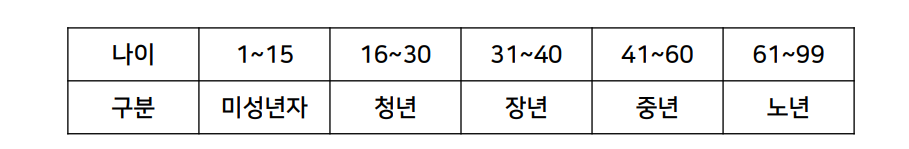

In [97]:
# 데이터
ages = [0,2,10,21,23,37,31,61,20,41,32,45,100,102,87,5,7]
# 구간나누기
bins = [0,15,30,40,60,99]
# 카테고리명
labels = ["미성년자", "청년", "장년","중년","노년"]
categorie = pd.cut(ages, bins, labels = labels)

In [98]:
categorie

[NaN, '미성년자', '미성년자', '청년', '청년', ..., NaN, NaN, '노년', '미성년자', '미성년자']
Length: 17
Categories (5, object): ['미성년자' < '청년' < '장년' < '중년' < '노년']

In [99]:
type(categorie)

pandas.core.arrays.categorical.Categorical

In [100]:
categorie.categories

Index(['미성년자', '청년', '장년', '중년', '노년'], dtype='object')

In [101]:
ageArr = pd.DataFrame(ages, columns = ["ages"])
# DF화 하기
ageArr["categories"] = pd.cut(ages, bins, labels = labels)
ageArr

,ages,categories
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,장년
6,31,장년
7,61,노년
8,20,청년
9,41,중년


In [102]:
ageArr["categories"].value_counts()

미성년자    4
장년      3
청년      3
노년      2
중년      2
Name: categories, dtype: int64